In [1]:
#import packages
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [2]:
#import the data files
df = pd.read_csv('../data/2017_diabetes_cleaned_vld.csv')


In [3]:
X = df[['bmi', 'physhlth', 'menthlth', 'michd', 'hchol', 'hblpr', 'vpa', 
        'hvdr', 'smok', 'incom50', 'cllgr','sex', 'age65']]   # independent variables
y = df['diabete']   # dependent variable 

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Bootstrap Aggregating/ Bagging Classifier

In [4]:
tree = DecisionTreeClassifier()
bagging_classifier = BaggingClassifier(base_estimator = tree, n_estimators = 1000, random_state = 42)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)

In [5]:
conf_matrix_bagging = confusion_matrix(y_test, y_pred)
print(conf_matrix_bagging)

[[43113  2182]
 [ 6191  1344]]


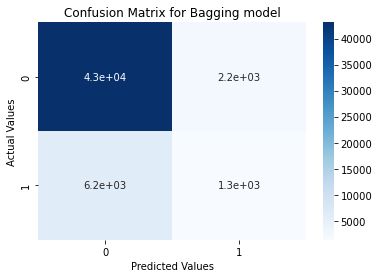

In [6]:
ax = sns.heatmap(conf_matrix_bagging, annot = True, cmap = 'Blues')

ax.set_title('Confusion Matrix for Bagging model')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
plt.show()

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:' ,accuracy)

Accuracy: 0.8415105053946621
